# Full & Reduced model with protocol SYN_BACKGROUND_HIGH

Run the protocol SYN_BACKGROUND_HIGH with the full Gillies & Willshaw (2005) STN model, then reduce the model according to our BranchZip algorithm, then rerun protocol and compare responses

## Changes since last simulation

- For each synapse, the median frequency of a stereotipical PSP is measured (in cell with spiking Na channels disabled)
- Synapses are still mapped to a location where the transfer impedance Zc is closest to that in original model
- However, for each synapse type, Zc is computed at the aforementioned median frequency
- => this should make the PSP at the soma elicited by that synapse in closer correspondence to the full model

In [ ]:
# Enable interactive plots with backend 'notebook'
%matplotlib notebook

# Enable connecting with ipyton console --existing
# %connect_info

# print code version (hash of checked out version)
!git log -1

# print date and time of script execution
import datetime
print("\nNotebook executed at at {} in following directory:".format(datetime.datetime.now()))
%cd ..
%pwd

In [ ]:
# Import all our functions
from evalmodel.stn_model_evaluation import *

## Build full STN model

Build the Gillies & Willshaw STN model

In [ ]:
full_model = StnModel.Gillies2005
red_model = StnModel.Gillies_FoldMarasco

# Make cell model and evaluator
evaluator = StnModelEvaluator(full_model, PhysioState.NORMAL)
evaluator.build_cell(full_model)

In [ ]:
# inspect the model (this pops up a GUI window outside browser)
from neuron import gui

Now you can inspect the model in NEURON GUI: click __Tools > ModelView > Soma > Point Processes > GABAsyn & GLUsyn__

Distribution of GABA synapses:

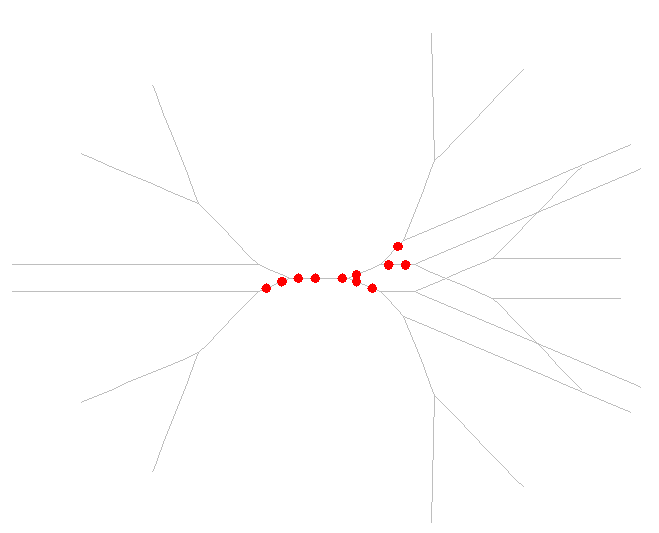

Distribution of GLU synapses:

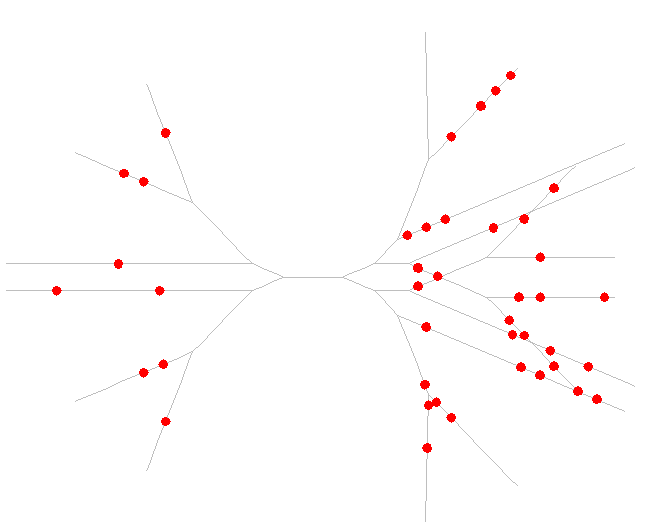

## Run full STN model

Run the protocol

Explanation of plots:

- the first plot are incoming spikes from GPE (i.e.: spikes generated with a temporal pattern that is statistically similar to that of GPe neurons in vivo)


- the second plot are incoming spikes from Cortex (CTX)


- the first plot is the membrane voltage in several compartments (soma, a radnom distal segment, and in several compartments where GLU and GABA synapses are located)

In [ ]:
proto = StimProtocol.SYN_BACKGROUND_HIGH

# Run protocol
evaluator.setup_run_protocol(proto)
evaluator.plot_traces(proto)

## Reduce STN model

Collapse dendritic trees using BranchZip algorithm, then remap synapses

In [ ]:
red_model = StnModel.Gillies_FoldMarasco

# Model reduction
evaluator.build_cell(red_model)
evaluator.target_model = red_model

Now you can inspect the model in NEURON GUI: click __Tools > ModelView > Soma > Point Processes > GABAsyn & GLUsyn__

GABA synapses:

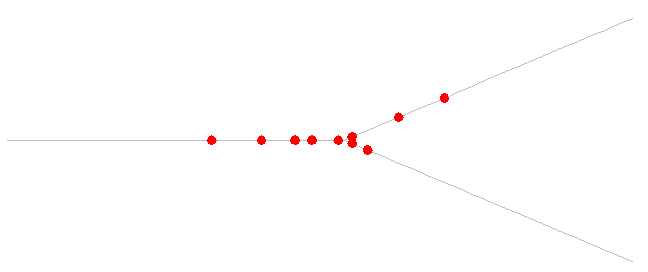


GLU synapses:

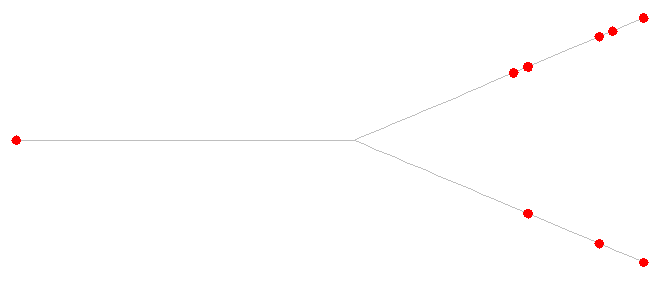

## Run reduced STN model

Run the same stimulation protocol with the reduced model.

In [ ]:
# Run Protocol
evaluator.setup_run_protocol(proto)
evaluator.plot_traces(proto)